In [1]:
# Cell 1
import os
import sys
import tensorflow as tf

sys.path.append(os.path.abspath('../src'))
from models_randomForest import train_model
from evaluate import evaluate_model
from data import preprocess_data

# Cell 2 - Define paths
RAW_PATH = '../data/raw/marine_water_quality.xlsm'
PROCESSED_PATH = '../data/processed/marine_water_quality_cleaned.csv'
MODEL_PATH = '../results/reports/model_RandomForest.pkl'
RESULTS_DIR = '../results/metrics/'

with tf.device('/device:GPU:0'):
    # Cell 3 - Preprocess
    preprocess_data(RAW_PATH, PROCESSED_PATH)

# Cell 4 - Train
    model, label_encoder, X_test, y_test = train_model(PROCESSED_PATH, MODEL_PATH)

# Cell 5 - Evaluate
    evaluate_model(model, label_encoder, X_test, y_test, RESULTS_DIR)




2025-04-22 14:51:24.774959: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-22 14:51:24.774977: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-22 14:51:24.774986: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-22 14:51:24.774999: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-22 14:51:24.775009: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/anshbharti/Documents/SEM-6TH/water_quality_prediction/src/models_randomForest.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric

                      precision    recall  f1-score   support

           drinkable       0.96      0.97      0.97      1103
good for marine life       0.95      0.96      0.95       898
      non consumable       0.98      0.85      0.91       106

            accuracy                           0.96      2107
           macro avg       0.96      0.93      0.94      2107
        weighted avg       0.96      0.96      0.96      2107



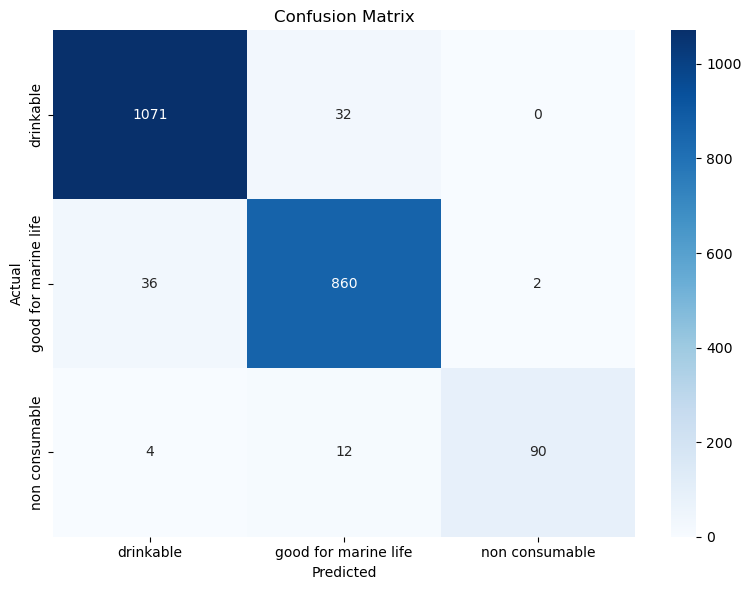

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)

# Convert encoded labels back to original
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
print("Done")